

Selected Class: 2
Test Image 2 is closest to Class Image 38 with Manhattan Distance: 43.06953048886675
Test Image 2 is closest to Class Image 12 with Manhattan Distance: 43.75803934596479
Test Image 2 is closest to Class Image 2 with Manhattan Distance: 44.77853851206601
Test Image 4 is closest to Class Image 34 with Manhattan Distance: 48.378787809249125
Test Image 4 is closest to Class Image 32 with Manhattan Distance: 56.09523796857823

Selected Class: 3
Test Image 4 is closest to Class Image 1 with Manhattan Distance: 58.48805541358888
Test Image 5 is closest to Class Image 1 with Manhattan Distance: 61.72906914539635
Test Image 4 is closest to Class Image 3 with Manhattan Distance: 65.80129352305084
Test Image 4 is closest to Class Image 16 with Manhattan Distance: 70.86356593482196
Test Image 4 is closest to Class Image 32 with Manhattan Distance: 71.93118768249644

Selected Class: 4
Test Image 5 is closest to Class Image 19 with Manhattan Distance: 49.222297886386514
Test Imag

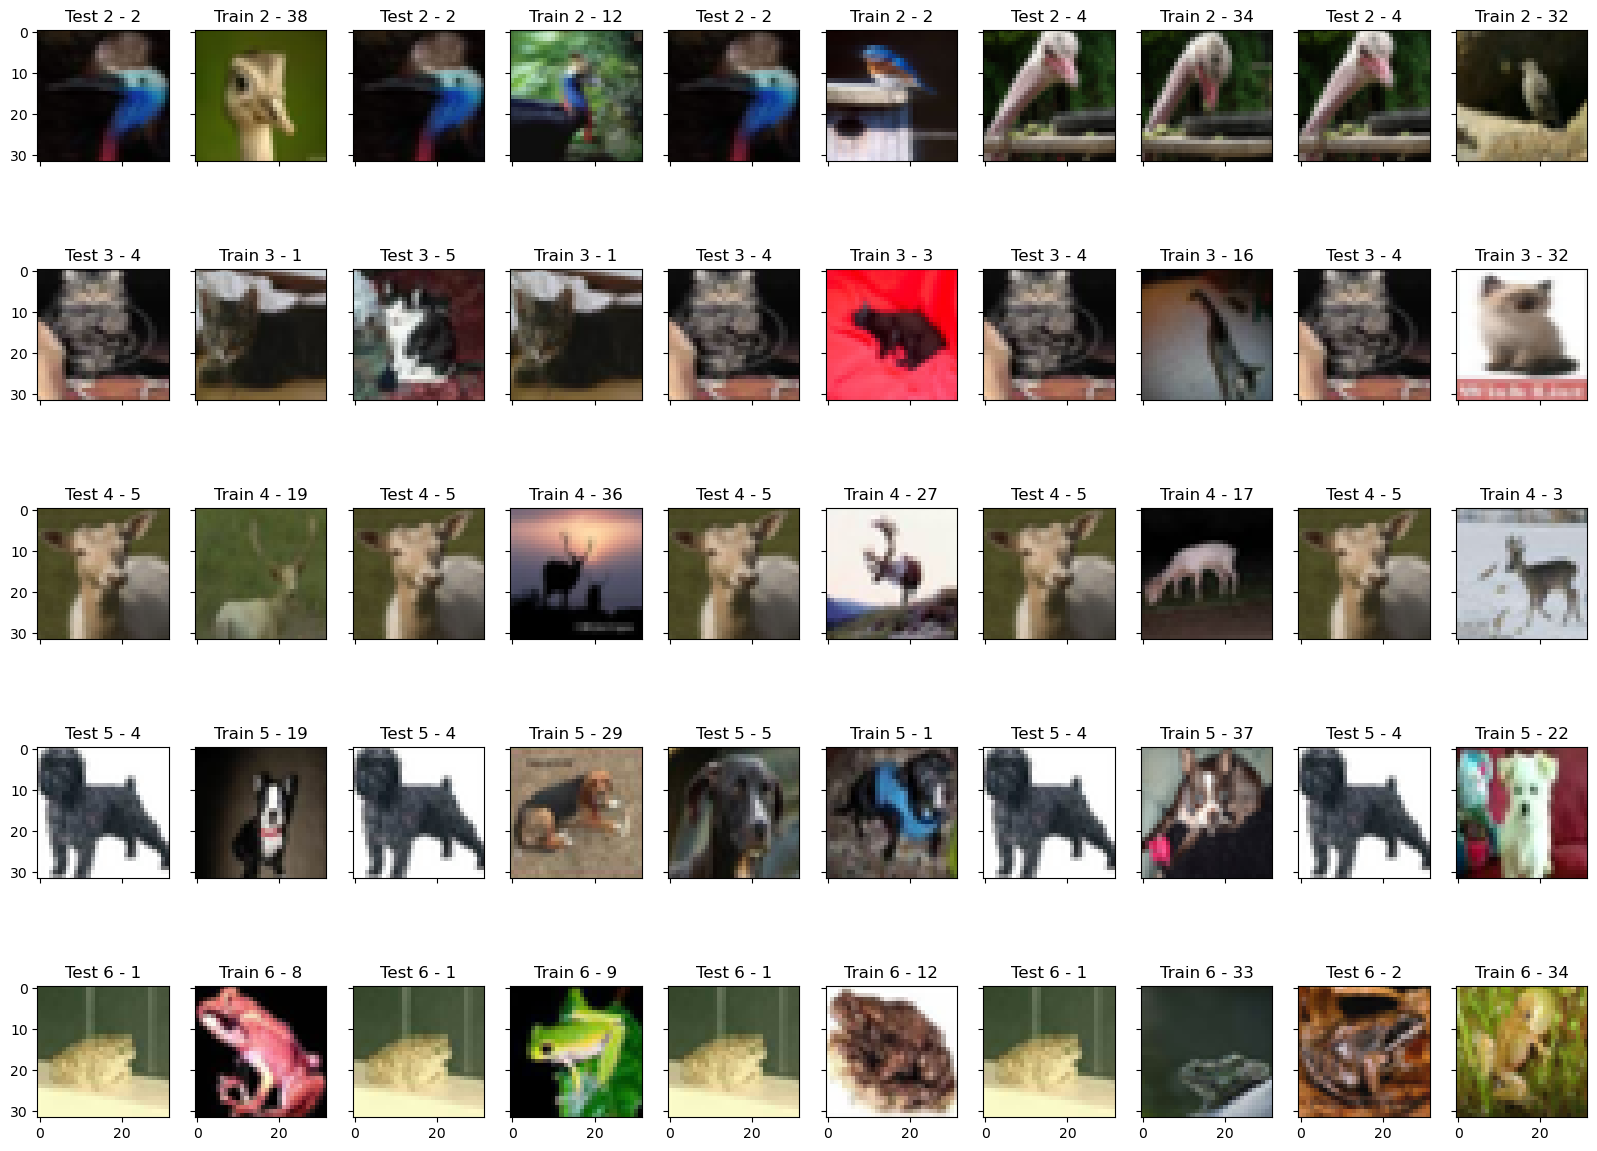

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt

def calculate_normalized_histograms(images):
    normalized_histograms = []
    total_pixels = 0

    for i in range(len(images)):
        image = images[i]
        histogram = []
        for channel in range(3):  # 0: Red, 1: Green, 2: Blue
            hist = cv2.calcHist([image], [channel], None, [256], [0, 256])
            histogram.extend(hist.flatten())

        total_pixels += image.size
        normalized_histogram = np.array(histogram) / total_pixels  # Normalize et
        normalized_histogram = (normalized_histogram - np.min(normalized_histogram)) / (np.max(normalized_histogram) - np.min(normalized_histogram))  # Min-Max normalizasyonu
        normalized_histograms.append(normalized_histogram)

    return np.array(normalized_histograms)

# CIFAR-10 veri kümesini yükle
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# İlgili sınıfların endeksleri (2: bird, 3: cat, 4: deer, 5: dog, 6: frog)
selected_classes = [2, 3, 4, 5, 6]

fig, axes = plt.subplots(5, 10, figsize=(20, 15))

for idx, selected_class in enumerate(selected_classes):
    # Seçilen sınıfa ait olan verileri filtrele
    selected_indices = np.where(train_labels.flatten() == selected_class)[0]
    class_images = train_images[selected_indices[:40]]
    
    normalized_histograms = calculate_normalized_histograms(class_images)

    # Test resimleri için histogramları hesapla ve normalize et
    test_images = train_images[selected_indices[40:45]]
    test_histograms = calculate_normalized_histograms(test_images)

    distances = []

    for i in range(len(test_histograms)):
        for j in range(len(normalized_histograms)):
            distance = np.sum(np.abs(normalized_histograms[j] - test_histograms[i]))
            distances.append((i, j, distance))

    # Mesafeleri küçükten büyüğe sırala
    sorted_distances = sorted(distances, key=lambda x: x[2])
        
    print(f"\nSelected Class: {selected_class}")
    for i in range(5):
        test_index, train_index, distance = sorted_distances[i]
        print(f"Test Image {test_index+1} is closest to Class Image {train_index+1} with Manhattan Distance: {distance}")
               
    # En yakın 5 resmi göster
    for i in range(5):
        test_index, train_index, distance = sorted_distances[i]

        ax = axes[idx, i * 2]
        ax.imshow(test_images[test_index])
        ax.set_title(f'Test {selected_class} - {test_index+1}')

        ax = axes[idx, i * 2 + 1]
        ax.imshow(class_images[train_index])
        ax.set_title(f'Train {selected_class} - {train_index+1}')

        # Görüntü aralarına boşluk ekleyin
        for ax in axes.flat:
            ax.label_outer()
plt.show()
